# Vad är EDA?

Explatory data analysis. Målet är att förstå datan


För att förstå datan måste vi veta om den är ren och eventuellt göra data cleaning. Sen, beroende på vad det är för data så måste vi undersöka den med olika tekniker för att kunna dra några slutsatser.

### Objectives 

1. Efter en EDA ska vå data vara clean
2. Efter en eda ska vi kunna presentera någon insight om datan
    
    
# Steg

### 1. Förstå data

Förstå variablerna och vad de innehåller. Har t.ex. kolumnen 'total vaccinated' kumulativa värden, eller är det antalet som blev vaccinerade just den dagen?   


### 2. Data cleaning

Värden som saknas eller tydliga outliers måste bort. Anledningen är att de kan störa eller förstöra för oss i senare lägen. Kanske finns det också överflödig eller irrelevant data som vi kan kasta bort.

Vi kan hitta saknade värden med t.ex pd.isna, men outliers kan vara svårare att hitta och kräver att vi antingen visualiserar datan eller att vi testar något statistiskt mått.


### 3. Analysera datan

Vad kan vi förstå utifrån datan? 
T.ex.
- Visualisera olika förhållanden
- Beräkna nya columner utifrån datan vi har



### Dataset - Studentinformation
Taget från
https://www.kaggle.com/spscientist/students-performance-in-exams

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('student.csv')

## Steg1 - Förstå datan

Pandas funktioner och attribut till dataframes som är bra att använda:

- dtypes
- len()
- columns
- head()
- tail()
- describe()
- count()
- nunique()
- unique()
- isna()

In [3]:
len(data)

1000

In [14]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [12]:
data['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [13]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [24]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Data cleaning

- dropna
- fillna
- ta bort onödiga kolumner

In [25]:
data = data.dropna()
len(data)

1000

In [29]:
#data = data.drop(['race/ethnicity'], axis='columns')
data.drop(['race/ethnicity'], axis='columns', inplace=True)

In [30]:
data.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,standard,none,72,72,74
1,female,some college,standard,completed,69,90,88
2,female,master's degree,standard,none,90,95,93
3,male,associate's degree,free/reduced,none,47,57,44
4,male,some college,standard,none,76,78,75


## Relationship analysis

1. Korrelationsmatris
2. Histogram
3. Pairplot
4. Relplot med hues för olika klasser

<AxesSubplot:>

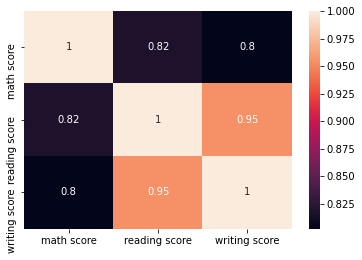

In [32]:
correlation = data.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

<AxesSubplot:xlabel='math score', ylabel='Count'>

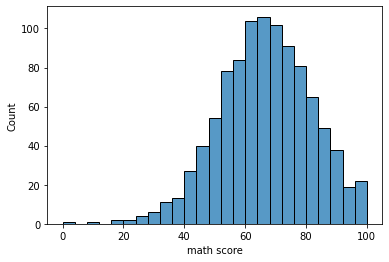

In [37]:
sns.histplot(data['math score'])

<AxesSubplot:xlabel='reading score', ylabel='Count'>

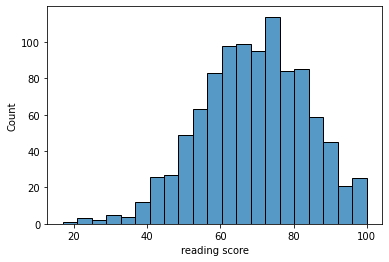

In [38]:
sns.histplot(data['reading score'])

<AxesSubplot:xlabel='writing score', ylabel='Count'>

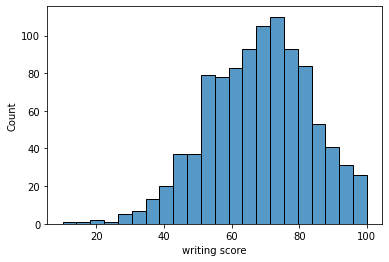

In [39]:
sns.histplot(data['writing score'])

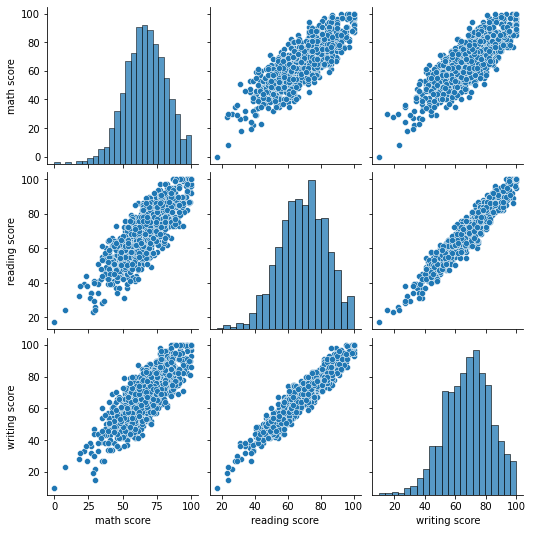

In [40]:
sns.pairplot(data)

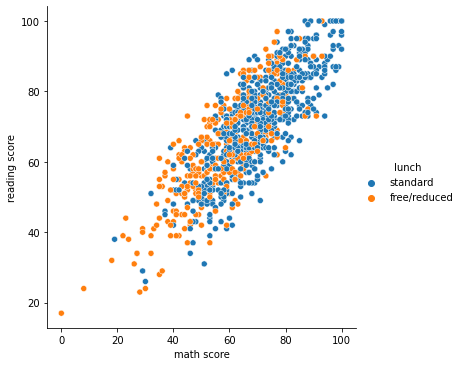

In [41]:
sns.relplot(x='math score', y='reading score', hue='lunch', data=data)

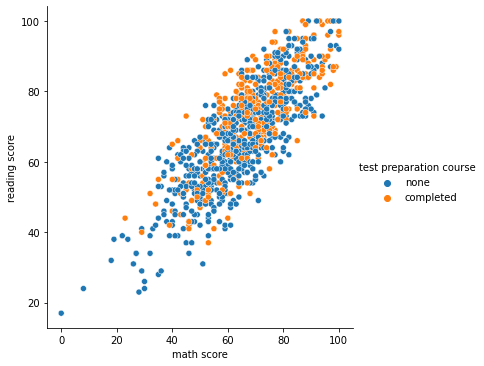

In [42]:
sns.relplot(x='math score', y='reading score', hue='test preparation course', data=data)

### Betyg

Låt oss säga att betyg för ämnena delas in i följande:
- 0-50: IG
- 50-70: G
- 70-85: VG
- 85-100: MVG


och att vi vill lägga till det i vår dataframe

In [43]:
def gradify(row, column_name):
    score = row[column_name]
    if score < 50:
        return 'ig'
    elif score < 70:
        return 'g'
    elif score < 85:
        return 'vg'
    else:
        return 'mvg'
    

In [49]:
data['writing grade'] =data.apply(lambda row: gradify(row, 'writing score'), axis=1)
data.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,math grade,reading grade,writing grade
0,female,bachelor's degree,standard,none,72,72,74,vg,vg,vg
1,female,some college,standard,completed,69,90,88,g,mvg,mvg
2,female,master's degree,standard,none,90,95,93,mvg,mvg,mvg
3,male,associate's degree,free/reduced,none,47,57,44,ig,g,ig
4,male,some college,standard,none,76,78,75,vg,vg,vg


# Maskininlärningsmodell för prediktion



## Scikit-learn 

Scikitlearn är ett bibliotek för klassisk maskininlärning som innehåller massor av modeller och tekniker för en data scientist

Vi kommer att försöka träna en enkel klassificerare för att förutsäga en students betyg

In [52]:
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
import pickle

- female --> [0, 1, 0]
- male --> [1, 0, 0]
- binary --> [0, 0, 1]

## Model

- input --> output
- X --> y

input: gender, parental level of education, lunch, test preparation score
output: math grade


In [56]:
ohe_x = OneHotEncoder(sparse=False)
ohe_y = OneHotEncoder(sparse=False)

x_data = data[['gender', 'parental level of education', 'lunch', 'test preparation course']]
y_data = data[['math grade']]

x_data.head()
#y_data.head()

,gender,parental level of education,lunch,test preparation course
0,female,bachelor's degree,standard,none
1,female,some college,standard,completed
2,female,master's degree,standard,none
3,male,associate's degree,free/reduced,none
4,male,some college,standard,none


In [57]:
x = ohe_x.fit_transform(x_data)
y = ohe_y.fit_transform(y_data)

In [58]:
print(y[:5])
y_data.head()

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


,math grade
0,vg
1,g
2,mvg
3,ig
4,vg


In [59]:
tree_classifier = tree.DecisionTreeClassifier()

In [64]:
tree_classifier = tree_classifier.fit(x,y)

## Predict

In [61]:
new_student = {'gender': 'male',
       'parental level of education': 'some college',
       'lunch': 'standard',
       'test preparation course':'completed'}
new_student = pd.DataFrame(new_student, index=[0])
new_student

,gender,parental level of education,lunch,test preparation course
0,male,some college,standard,completed


In [62]:
x_new = ohe_x.transform(new_student)
x_new

array([[0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.]])

In [67]:
y_new = tree_classifier.predict(x_new)
y_new = [[0, 0, 1, 0]] # [[0, 0.25, 0.5, 0.25]] 

In [69]:
y_math_grade = ohe_y.inverse_transform(y_new)
y_math_grade

array([['mvg']], dtype=object)

In [75]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [80]:
df = sns.load_dataset('planets')
df.to_csv('planets.csv')

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [73]:
df = pd.DataFrame(boston)

ValueError: arrays must all be same length